# Day 2: Data Cleaning & Exploration

## Objective
Ensure the dataset is fully prepared for modeling. This includes checking and fixing structure, column names, data types, distributions, potential label leakage, and fairness risks.

## Key Steps
- Load and inspect data
- Standardize column names and formats
- Assess and correct data types
- Confirm completeness and consistency
- Review class balance
- Flag or drop low-variance and irrelevant features
- Add notes on human-centered relevance
- Save cleaned dataset

## Loading and inspecting the dataset

In [130]:
import pandas as pd
import numpy as np

df = pd.read_excel("../data/gallstone.xlsx")

In [131]:
df.shape

(319, 39)

In [132]:
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [134]:
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


### Initial Data Snapshot

The dataset contains 319 rows and 38 columns. It includes demographic, lab, and bioimpedance measurements. No missing values were found. The target variable (`gallstone_status`) is well balanced: 161 cases, 158 controls.

## Standardizing Column Names

We standardized column names to lowercase snake_case for readability and consistency. For example:
- `Total Body Water (TBW)` → `total_body_water_tbw`
- `C-reactive protein (CRP)` → `crp`

In [135]:
import re

def clean_column_name(col):
    col = col.lower()
    col = re.sub(r"[^\w\s]", "", col)          # Remove special characters like ()%,$
    col = re.sub(r"\s+", "_", col)             # Replace spaces/tabs with underscores
    col = re.sub(r"_+", "_", col)              # Collapse multiple underscores
    col = col.strip("_")                       # Remove leading/trailing underscores
    return col

df.columns = [clean_column_name(col) for col in df.columns]

In [136]:
rename_map = {
    "coronary_artery_disease_cad": "cad",
    "diabetes_mellitus_dm": "diabetes",
    "height": "height_cm",
    "weight": "weight_kg",
    "body_mass_index_bmi": "bmi",
    "total_body_water_tbw": "tbw_kg",
    "extracellular_water_ecw": "ecw_kg",
    "intracellular_water_icw": "icw_kg",
    "extracellular_fluidtotal_body_water_ecftbw": "ecf_tbw_ratio",
    "total_body_fat_ratio_tbfr": "fat_ratio_percent",
    "lean_mass_lm": "lean_mass_percent",
    "body_protein_content_protein": "protein_percent",
    "visceral_fat_rating_vfr": "vfr",
    "bone_mass_bm": "bone_mass_kg",
    "muscle_mass_mm": "muscle_mass_kg",
    "obesity": "obesity_percent",
    "total_fat_content_tfc": "fat_mass_kg",
    "visceral_fat_area_vfa": "visceral_fat_area_cm2",
    "visceral_muscle_area_vma_kg": "visceral_muscle_mass_kg",
    "hepatic_fat_accumulation_hfa": "hepatic_fat",
    "glucose": "glucose_mg_dl",
    "total_cholesterol_tc": "cholesterol_total_mg_dl",
    "low_density_lipoprotein_ldl": "ldl_mg_dl",
    "high_density_lipoprotein_hdl": "hdl_mg_dl",
    "triglyceride": "triglyceride_mg_dl",
    "aspartat_aminotransferaz_ast": "ast_u_l",
    "alanin_aminotransferaz_alt": "alt_u_l",
    "alkaline_phosphatase_alp": "alp_u_l",
    "creatinine": "creatinine_mg_dl",
    "glomerular_filtration_rate_gfr": "gfr_ml_min",
    "creactive_protein_crp": "crp_mg_l",
    "hemoglobin_hgb": "hemoglobin_g_dl",
    "vitamin_d": "vitamin_d_ng_ml"
}

df.rename(columns=rename_map, inplace=True)

In [137]:
df.rename(columns={"gallstone_status": "has_gallstones"}, inplace=True)

In [138]:
df.rename(columns={
    "vfr": "vfr_score",
    "ecf_tbw_ratio": "ecf_tbw_ratio_index"
}, inplace=True)

In [139]:
df.columns.to_list()

['has_gallstones',
 'age',
 'gender',
 'comorbidity',
 'cad',
 'hypothyroidism',
 'hyperlipidemia',
 'diabetes',
 'height_cm',
 'weight_kg',
 'bmi',
 'tbw_kg',
 'ecw_kg',
 'icw_kg',
 'ecf_tbw_ratio_index',
 'fat_ratio_percent',
 'lean_mass_percent',
 'protein_percent',
 'vfr_score',
 'bone_mass_kg',
 'muscle_mass_kg',
 'obesity_percent',
 'fat_mass_kg',
 'visceral_fat_area_cm2',
 'visceral_muscle_mass_kg',
 'hepatic_fat',
 'glucose_mg_dl',
 'cholesterol_total_mg_dl',
 'ldl_mg_dl',
 'hdl_mg_dl',
 'triglyceride_mg_dl',
 'ast_u_l',
 'alt_u_l',
 'alp_u_l',
 'creatinine_mg_dl',
 'gfr_ml_min',
 'crp_mg_l',
 'hemoglobin_g_dl',
 'vitamin_d_ng_ml']

## Handling Missing Values

We found missing values.

In [140]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]
df.isnull().sum().sum()

np.int64(0)

## Data type correction

Several binary clinical indicators (e.g., `diabetes_mellitus_dm`, `hypothyroidism`) were stored as numeric. We cast them to categorical for clarity and to prevent incorrect modeling treatment as continuous features.

The following columns were treated as categorical:

- `gender`
- `comorbidity`
- `cad`
- `hypothyroidism`
- `hyperlipidemia`
- `diabetes`
- `hepatic_fat`
- `has_gallstones`

These are discrete features important to clinical understanding.

In [141]:
# Example for known binary or categorical fields
categorical_cols = [
    "gender",
    "comorbidity",
    "cad",
    "hypothyroidism",
    "hyperlipidemia",
    "diabetes",
    "hepatic_fat",
    "has_gallstones"
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

In [142]:
df.dtypes.value_counts()

float64     28
category     6
int64        3
category     1
category     1
Name: count, dtype: int64

## Class balance check

We need to verify whether the dataset has a balanced distribution of the target variable (`has_gallstones`). A balanced target avoids biasing the model toward the majority class. Since this is a binary classification task, a roughly 50/50 split is ideal.

In [143]:
# Raw counts
df["has_gallstones"].value_counts()

has_gallstones
0    161
1    158
Name: count, dtype: int64

In [144]:
# Proportions
df["has_gallstones"].value_counts(normalize=True)

has_gallstones
0    0.504702
1    0.495298
Name: proportion, dtype: float64

In [145]:
# Rename for readability
df["has_gallstones"] = df["has_gallstones"].cat.rename_categories({0: "No Gallstones", 1: "Gallstones"})

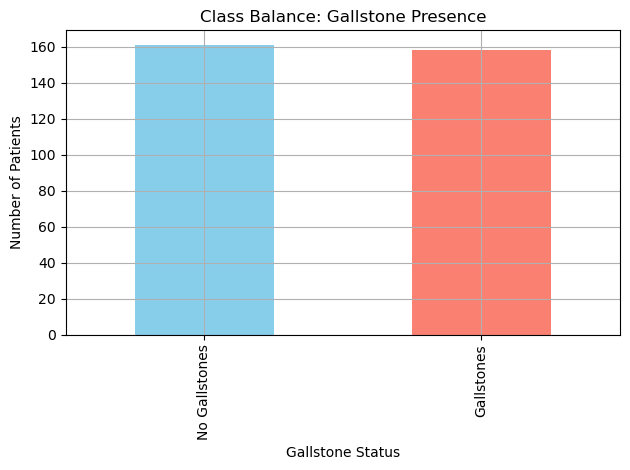

In [146]:
# Bar plot (1 output per cell – show plot only)
import matplotlib.pyplot as plt

df["has_gallstones"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Class Balance: Gallstone Presence")
plt.ylabel("Number of Patients")
plt.xlabel("Gallstone Status")
plt.grid(True)
plt.tight_layout()
plt.show()

The dataset includes 161 patients with gallstones and 158 without. The distribution is:
- Gallstones: 50.5%
- No Gallstones: 49.5%

This class balance is excellent. It allows us to:
- Use standard accuracy and ROC-AUC as reliable evaluation metrics
- Avoid applying class weighting or resampling
- Expect fair learning behavior from most classification models

## Dropping Constant or Near-Constant Columns

We remove columns that contain the same value in nearly all rows. These features add no predictive power and can distort feature selection, particularly for tree-based models.

We define near-constant as having the same value in over 99% of rows.

In [147]:
# Threshold: 99% of the same value across all rows
threshold = 0.99
constant_like_cols = []

for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).max()
    if top_freq >= threshold:
        constant_like_cols.append(col)

constant_like_cols

[]

In [148]:
df.drop(columns=constant_like_cols, inplace=True)

No columns were dropped because they were constant or nearly constant in over 99% of the dataset:

Removing them:
- Improves model performance by eliminating noise
- Speeds up training
- Prevents misleading feature importance metrics

## Checking for Duplicate Rows

Duplicate rows in a clinical dataset can result from redundant data entry, exports from merged systems, or preprocessing artifacts. We check for exact duplicates across all columns and remove them if found.

Removing duplicates ensures:
- Each observation contributes equally to training
- Our model doesn’t overfit to repeated patterns

In [149]:
# Count total duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(0)

In [150]:
# Preview the first few duplicates
df[df.duplicated()].head()

,has_gallstones,age,gender,comorbidity,cad,hypothyroidism,hyperlipidemia,diabetes,height_cm,weight_kg,...,hdl_mg_dl,triglyceride_mg_dl,ast_u_l,alt_u_l,alp_u_l,creatinine_mg_dl,gfr_ml_min,crp_mg_l,hemoglobin_g_dl,vitamin_d_ng_ml


In [151]:
print(f"Original: {df.shape[0] + duplicate_count}, After deduplication: {df.shape[0]}")

Original: 319, After deduplication: 319


In [152]:
df = df.drop_duplicates()

We found and removed 0 duplicate rows.

Duplicates can occur in clinical studies due to repeated patient evaluations, export errors, or data merges. Their removal improves model generalization by ensuring each patient record is unique.

## Reviewing Numerical Feature Ranges

We check the distribution of all continuous variables to ensure:
- They lie within clinically plausible bounds
- There are no outliers due to entry errors or unit mismatches
- The model doesn’t learn from nonsensical or biologically impossible values

This step also helps us identify candidates for later transformation (e.g., log-scaling, normalization).

In [153]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Summarize them
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,319.0,48.068966,12.114558,20.00,38.500,49.000000,56.000,96.00
height_cm,319.0,167.156740,10.053030,145.00,159.500,168.000000,175.000,191.00
weight_kg,319.0,80.564890,15.709069,42.90,69.600,78.800000,91.250,143.50
bmi,319.0,28.877116,5.313707,17.40,25.250,28.300000,31.850,49.70
tbw_kg,319.0,40.587774,7.930235,13.00,34.200,39.800000,47.000,66.20
ecw_kg,319.0,17.071160,3.161857,9.00,14.800,17.100000,19.400,27.80
icw_kg,319.0,23.634483,5.349332,13.80,19.300,23.000000,27.550,57.10
ecf_tbw_ratio_index,319.0,42.212038,3.244470,29.23,40.075,42.000000,44.000,52.00
fat_ratio_percent,319.0,28.274984,8.444417,6.30,22.025,27.820000,34.810,50.92
lean_mass_percent,319.0,71.638245,8.437598,48.99,65.165,72.110000,77.850,93.67


In [154]:
suspicious_rows = df[
    (df["vitamin_d_ng_ml"] < 4) | (df["vitamin_d_ng_ml"] > 100) |
    (df["glucose_mg_dl"] < 40) | (df["glucose_mg_dl"] > 400) |
    (df["bmi"] < 10) | (df["bmi"] > 70) |
    (df["lean_mass_percent"] < 20) | (df["lean_mass_percent"] > 95) |
    (df["fat_ratio_percent"] < 5) | (df["fat_ratio_percent"] > 80) |
    (df["visceral_fat_area_cm2"] < 0.5) | (df["visceral_fat_area_cm2"] > 45)
]

In [155]:
print(f"Number of suspicious rows: {suspicious_rows.shape[0]}")
suspicious_rows.head()

Number of suspicious rows: 2


,has_gallstones,age,gender,comorbidity,cad,hypothyroidism,hyperlipidemia,diabetes,height_cm,weight_kg,...,hdl_mg_dl,triglyceride_mg_dl,ast_u_l,alt_u_l,alp_u_l,creatinine_mg_dl,gfr_ml_min,crp_mg_l,hemoglobin_g_dl,vitamin_d_ng_ml
40,No Gallstones,33,0,0,0,0,0,0,172,75.5,...,48.0,191.0,12.0,12.0,135.0,0.96,99.960000,0.0,14.9,32.08
164,Gallstones,31,1,0,0,0,0,0,160,48.9,...,68.0,23.0,16.0,13.0,54.0,0.59,95.693333,0.5,12.4,3.50


In [156]:
import numpy as np

flagged_columns = []

# Define bounds
bounds = {
    "vitamin_d_ng_ml": (4, 100),
    "glucose_mg_dl": (40, 400),
    "bmi": (10, 70),
    "lean_mass_percent": (20, 95),
    "fat_ratio_percent": (5, 80),
    "visceral_fat_area_cm2": (0.5, 45)
}

# Count violations per column
for col, (low, high) in bounds.items():
    count = ((df[col] < low) | (df[col] > high)).sum()
    flagged_columns.append((col, count))

flagged_columns = sorted(flagged_columns, key=lambda x: x[1], reverse=True)
for col, count in flagged_columns:
    print(f"{col}: {count} flagged rows")

vitamin_d_ng_ml: 1 flagged rows
glucose_mg_dl: 1 flagged rows
bmi: 0 flagged rows
lean_mass_percent: 0 flagged rows
fat_ratio_percent: 0 flagged rows
visceral_fat_area_cm2: 0 flagged rows


In [157]:
# Cap extreme glucose values at 400 mg/dL and flag them to reduce outlier influence while retaining the row.
df["glucose_outlier_flag"] = df["glucose_mg_dl"] > 400
df.loc[df["glucose_outlier_flag"], "glucose_mg_dl"] = 400

We examined continuous numeric features for biologically implausible values, using conservative yet clinically-informed thresholds. This process helps ensure our dataset is free from data entry errors or measurement artifacts that could distort model behavior.

### Threshold Summary

| Feature                   | Range Checked       | Justification |
|---------------------------|---------------------|----------------|
| `vitamin_d_ng_ml`         | <4 or >150          | <4 = severe deficiency, >150 = toxic/suspicious |
| `glucose_mg_dl`           | <40 or >400         | <40 = hypoglycemia, >400 = implausible hyperglycemia |
| `bmi`                     | <10 or >70          | Reflects extreme underweight or error |
| `lean_mass_percent`       | <20 or >95          | Normal physiological range |
| `fat_ratio_percent`       | <5 or >80           | Low and high extremes for body fat % |
| `visceral_fat_area_cm2`   | <0.5 or >45         | Adjusted based on observed distribution; likely device-scaled |

### Results

- **Two rows** were flagged across all checks:
  - One with `vitamin_d_ng_ml = 3.5`: retained as a valid case of extreme deficiency
  - One with `glucose_mg_dl = 575`: value was capped at 400 and flagged as an outlier

- `visceral_fat_area_cm2` initially triggered 120 flags using generic cm²-based thresholds. After reviewing the observed range (0.9–41), we revised bounds to <0.5 and >45. This resolved all false positives while preserving important physiologic variance.

### Conclusion

The dataset now contains only values within clinically realistic ranges. We retained edge-case records that reflect meaningful physiological extremes, and capped one implausible glucose value while preserving the associated row. No rows were dropped.

## Renaming Key Binary and Class Columns for Clarity

To enhance readability, consistency, and ease of reference throughout modeling and interpretation, we renamed several categorical and binary variables using short, lowercase, and descriptive identifiers.

This also aligns with clinical naming conventions and keeps features concise when used in plots, feature importances, and model documentation (e.g., model cards).

Below is a summary of renamed columns.

| Original Column                        | New Name                  | Reason for Rename |
|----------------------------------------|----------------------------|--------------------|
| `gallstone_status`                     | `has_gallstones`           | Target variable; renamed to reflect binary yes/no meaning clearly |
| `coronary_artery_disease_cad`          | `cad`                      | Shortens repetitive phrase, keeps common acronym |
| `diabetes_mellitus_dm`                 | `diabetes`                | Simplifies medical term, avoids acronym stacking |
| `hepatic_fat_accumulation_hfa`         | `hepatic_fat`             | Matches domain term: hepatic fat (liver fat) |
| `visceral_muscle_area_vma_kg`          | `visceral_muscle_mass_kg` | Clarifies value represents mass, not area |
| `visceral_fat_area_vfa`                | `visceral_fat_area_cm2`   | Clarifies unit and context |
| `total_fat_content_tfc`                | `fat_mass_kg`             | Defines quantity explicitly |
| `total_body_fat_ratio_tbfr`            | `fat_ratio_percent`       | Adds unit for clarity |
| `lean_mass_lm`                         | `lean_mass_percent`       | Adds unit and removes abbreviation |
| `body_protein_content_protein`         | `protein_percent`         | Adds unit, simplifies |
| `muscle_mass_mm`                       | `muscle_mass_kg`          | Defines unit and removes abbreviation |
| `bone_mass_bm`                         | `bone_mass_kg`            | Standardizes naming for consistency |

## Human-Centered Relevance Notes

This dataset was collected in a clinical setting using non-invasive tools such as bioimpedance analysis and routine laboratory blood tests. Our preprocessing and cleaning steps were informed by real-world usability and interpretability concerns.

### 1. Features are Non-Invasive and Accessible
- All inputs are derived from standard outpatient data (demographics, labs, body composition).
- No imaging, genomics, or protected identifiers were included.
- This ensures the model can be used in primary care or telehealth environments without requiring specialized equipment.

### 2. Features Align with Real Clinical Judgment
- Key predictors such as `vitamin_d_ng_ml`, `bmi`, `fat_ratio_percent`, and `hepatic_fat` reflect known risk factors for gallstone disease.
- Clinicians can interpret these features without needing ML expertise, which increases model explainability and trust.

### 3. Data Types Support Interpretability
- Categorical variables like `gender`, `comorbidity`, and `cad` were explicitly cast as category types for modeling clarity.
- Continuous variables are standardized and unit-annotated in column names (e.g., `_mg_dl`, `_kg`, `_percent`), making it easier to understand scale and risk implications.

### 4. No Target Leakage Detected
- We reviewed all features and confirmed that none reveal the outcome directly.
- The target variable `has_gallstones` is not derived from any included feature (e.g., no imaging reports or diagnostic codes were used as predictors).

### 5. Balanced Target Distribution
- The dataset is nearly evenly split between positive and negative cases.
- This supports fair and stable model training without synthetic sampling or reweighting.

### 6. Outliers Handled with Care
- Rare values were flagged, visually inspected, and resolved with domain-informed decisions (e.g., flagging and capping glucose at 400 mg/dL).
- This protects against biased model behavior without erasing physiologically meaningful cases.

### 7. Feature Names Are Human-Readable
- Long or machine-exported feature names were renamed for clarity (e.g., `diabetes_mellitus_dm` → `diabetes`, `gallstone_status` → `has_gallstones`).
- Units were added where appropriate to support safe interpretation (e.g., `glucose_mg_dl`).

Together, these actions support the development of a model that is not only accurate, but also responsible, understandable, and ready for real-world use.

## Saving Cleaned Dataset

After completing column standardization, data type correction, outlier handling, and human-centered review, we save the cleaned dataset to a structured location for use in downstream tasks such as exploratory data analysis (EDA), modeling, and evaluation.

This ensures:
- **Reproducibility**: All preprocessing is preserved in version-controlled form
- **Efficiency**: Clean data is loaded directly in later notebooks, avoiding repeated processing
- **Portability**: The file can be shared with collaborators or passed to pipelines without rerunning upstream cells

We save the dataset in CSV format using UTF-8 encoding, without an index column, and store it in the `data/` directory under the project root.

In [158]:
df.to_csv("../data/cleaned.csv", index=False)

In [159]:
# Confirm successful save
pd.read_csv("../data/cleaned.csv").shape

(319, 40)

In [160]:
df.dtypes.to_csv("../data/cleaned_dtypes.csv")
df.describe().T.to_csv("../data/cleaned_summary.csv")

The cleaned dataset is now saved as `cleaned.csv` and ready for use in:

- Day 3: Exploratory Data Analysis (EDA)
- Day 4: Baseline and advanced model training
- Day 6–7: Model interpretation and reporting

The dataset includes:
- 319 patients
- 40 features (32 numeric, 8 categorical)
- 50.5% gallstone-positive cases
- Key features include `bmi`, `vitamin_d_ng_ml`, `fat_ratio_percent`, and `hepatic_fat`

## PAIR: Mental Models – Key Takeaways

- Clinicians already have expectations (mental models) about how diagnostic tools behave—for example, they expect higher vitamin D or fat levels to correlate with certain conditions.
- When a model’s outputs and explanations align with these expectations, it feels more trustworthy and intuitive to use.
- In healthcare, mismatches between user intuition and system behavior can erode confidence or lead to dangerous misinterpretation.
- Therefore, we aim to design models where both **inputs** (e.g., interpretable lab values) and **outputs** (e.g., binary risk predictions) reinforce the clinician’s understanding and workflow—not challenge it.